In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline

In [3]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [4]:
IMG_PATH = '/Users/macbookpro/Pictures/grace.png'

In [5]:
image = np.array(Image.open(IMG_PATH).convert('L'))
n, w = image.shape
image = image.reshape((n, w, 1))

In [6]:
import numpy as np
import convolve as conv

## Naive convolution

In [7]:
# Sobol fiter
K = np.array([
    [1, 0, -1],
    [2, 0, -2],
    [1, 0, -1]]).reshape(3, 3, 1)
b = 0

In [8]:
X_conv, X_pad = conv.convolve(image, K, b, p=0, s=1)

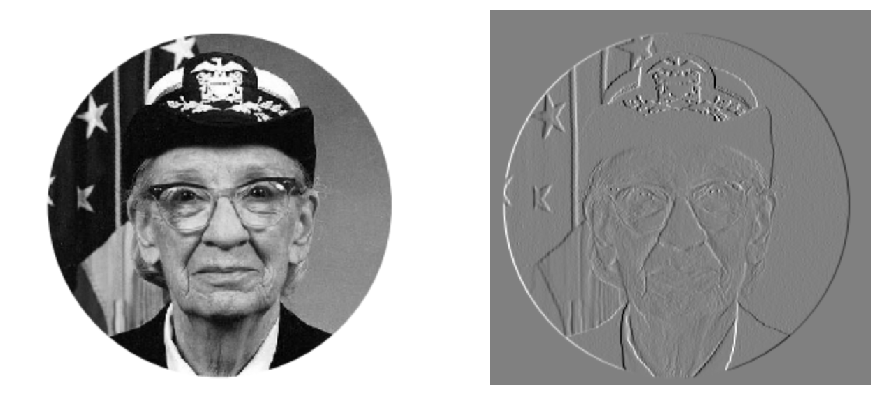

In [9]:
# Display the image and result of the conv op.
f, axarr = plt.subplots(1, 2, figsize=(15, 10))
for ax, X in zip(axarr, [image, X_conv]):
    ax.imshow(np.squeeze(X), cmap='gray')
    ax.axes.axis('off');

## Vectorised convolution

In [10]:
from cnn import CNN

In [11]:
cnn = CNN(K)
res = cnn(np.squeeze(image))

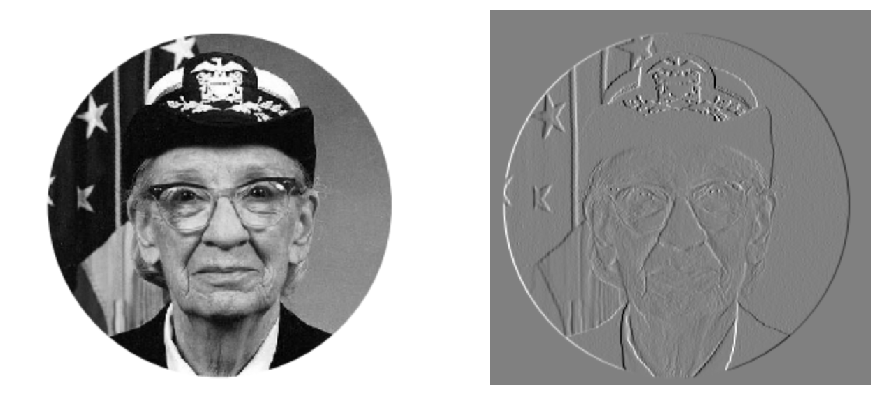

In [12]:
# Display the image and result of the conv op.
f, axarr = plt.subplots(1, 2, figsize=(15, 10))
for ax, X in zip(axarr, [image, res]):
    ax.imshow(np.squeeze(X), cmap='gray')
    ax.axes.axis('off');

# Speed comparison

In [13]:
h, w = 70, 70
X = np.arange(1, h*w +1 ).reshape((h, w))

W =np.array([
    [1, 0, -1],
    [2, 0, -2],
    [1, 0, -1]])

## Sliding-window convolution

In [14]:
%%timeit
A_1, b = conv.convolve(X.reshape(h, w, 1), W.reshape(3, 3, 1), 0, p=0, s=1)

40.4 ms ± 3.52 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


## Vectorized version

In [15]:
%%timeit
A_2 = cnn(X)

1.43 ms ± 40.6 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


## Built-in convolution2d

In [16]:
from scipy.signal import convolve2d

In [17]:
%%timeit
A_3 = convolve2d(X, W, mode='valid')

217 µs ± 15 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
